# 04 - Applied ML

In [179]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from operator import itemgetter
from scipy.stats import kstest

from scipy.stats import pareto
from scipy.stats import powerlaw
from scipy.stats import rayleigh

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv('lalonde.csv', index_col=[0])

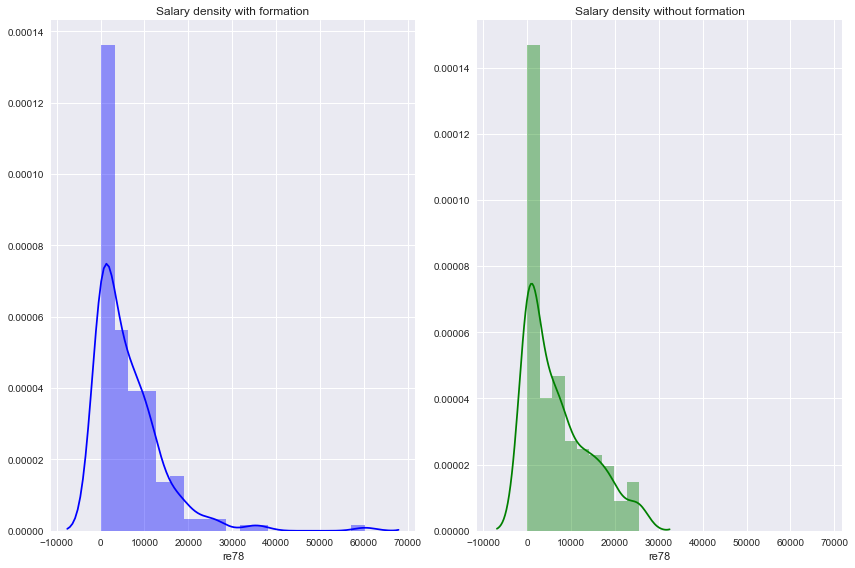

In [238]:
treated_res = df[df['treat'] == 1]['re78']
not_treated_res = df[df['treat'] == 0]['re78']

f, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=True)
ax = axes[0]
ax.set_title("Salary density with formation")
sns.distplot(treated_res, color="b",  ax=ax);
ax = axes[1]
ax.set_title("Salary density without formation")
sns.distplot(not_treated_res, color="g", ax=ax);
plt.tight_layout()

Note about Kolmogorov-Smirnov test: even if very small difference, test will be zero, since test for exact match.
cf. https://stats.stackexchange.com/questions/74434/kolmogorov-smirnov-test-strange-output

In [276]:
stats.power_divergence(treated_res, lambda_="freeman-tukey")

/opt/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:4553: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/opt/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:4553: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)


Power_divergenceResult(statistic=nan, pvalue=nan)

In [266]:
for n in range(1,5):
    for n2 in range(1, 5):
        print(stats.kstest(treated_res, 'f', [n,n2]))

KstestResult(statistic=0.72247061154971226, pvalue=0.0)
KstestResult(statistic=0.75332374053660534, pvalue=0.0)
KstestResult(statistic=0.75631520981296152, pvalue=0.0)
KstestResult(statistic=0.75668692399293636, pvalue=0.0)
KstestResult(statistic=0.71926741635058788, pvalue=0.0)
KstestResult(statistic=0.75331784777126587, pvalue=0.0)
KstestResult(statistic=0.75638722756771593, pvalue=0.0)
KstestResult(statistic=0.75670977605701406, pvalue=0.0)
KstestResult(statistic=0.71799512279017708, pvalue=0.0)
KstestResult(statistic=0.75331587751440088, pvalue=0.0)
KstestResult(statistic=0.75641475264985236, pvalue=0.0)
KstestResult(statistic=0.75671748675525574, pvalue=0.0)
KstestResult(statistic=0.71731828131037112, pvalue=0.0)
KstestResult(statistic=0.75331489125628437, pvalue=0.0)
KstestResult(statistic=0.7564293783315359, pvalue=0.0)
KstestResult(statistic=0.75672135980945399, pvalue=0.0)


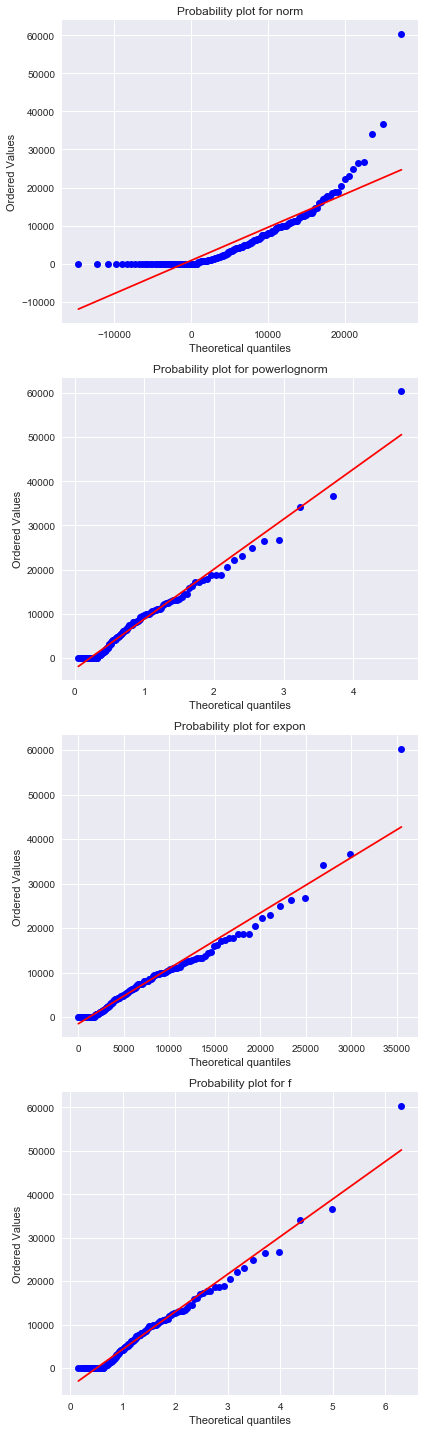

In [294]:
# dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 
dist_names = ['norm', 'powerlognorm', 'expon', 'f']
params = [stats.norm.fit(treated_res), [2, 1], stats.expon.fit(treated_res), [10,10]]
# results = []

# for dist in dist_names:
#     res = kstest(not_treated_res, dist, getattr(stats, dist).fit(not_treated_res))
#     results.append((dist, res[1]))
# max(results, key=itemgetter(1))
f, axes = plt.subplots(len(dist_names), 1, figsize=(6, len(dist_names)*5))

for idx, dist in enumerate(dist_names):
    ax = axes[idx]
    stats.probplot(treated_res, dist=dist, sparams=params[idx], plot=ax)
#   stats.probplot(treated_res, dist=dist, sparams=getattr(stats, dist).fit(treated_res), plot=ax)
    ax.set_title("Probability plot for " + dist)
plt.tight_layout()

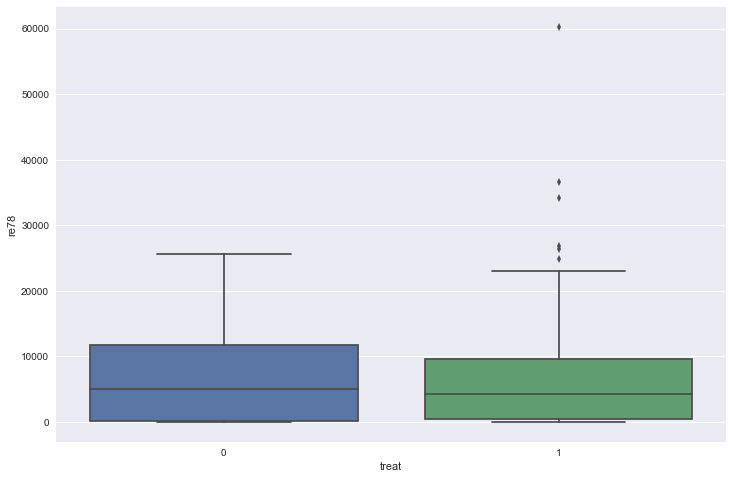

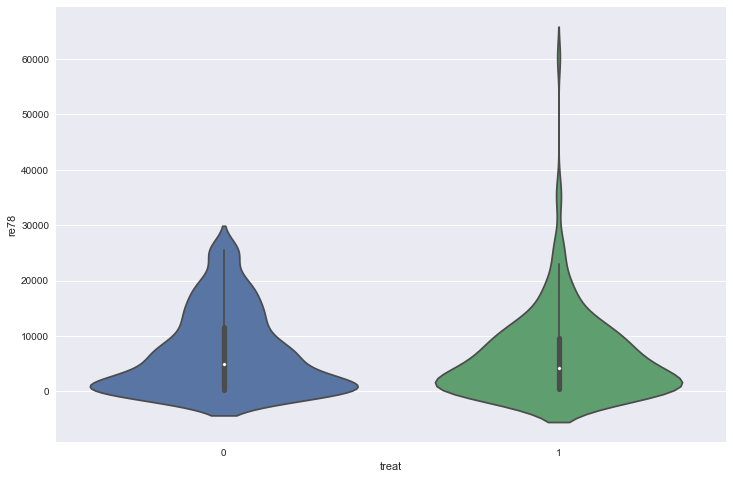

In [63]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y='re78',x='treat', data=df, ax=ax);
fig, ax = plt.subplots(figsize=(12,8))
sns.violinplot(y='re78',x='treat', data=df, ax=ax);

# 2

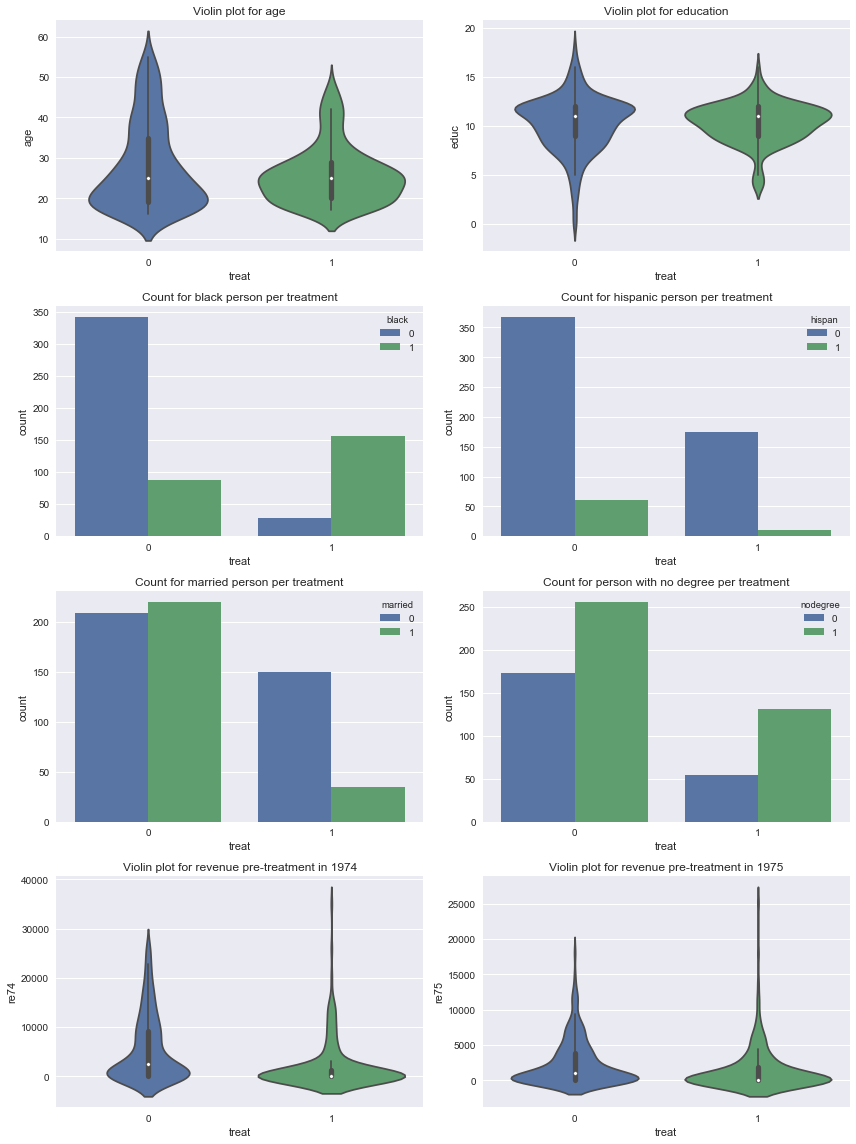

In [309]:
fig, axes = plt.subplots(4,2,figsize=(12,16))

axes[0, 0].set_title("Violin plot for age")
sns.violinplot(x='treat', y='age', data=df, ax=axes[0, 0])
axes[0, 1].set_title("Violin plot for education")
sns.violinplot(x='treat', y='educ', data=df, ax=axes[0, 1])

axes[1,0].set_title("Count for black person per treatment")
sns.countplot(x='treat',hue='black', data=df, ax=axes[1,0])
axes[1,1].set_title("Count for hispanic person per treatment")
sns.countplot(x='treat',hue='hispan', data=df, ax=axes[1,1])
axes[2,0].set_title("Count for married person per treatment")
sns.countplot(x='treat',hue='married', data=df, ax=axes[2,0])
axes[2,1].set_title("Count for person with no degree per treatment")
sns.countplot(x='treat',hue='nodegree', data=df, ax=axes[2,1])

axes[3, 0].set_title("Violin plot for revenue pre-treatment in 1974")
sns.violinplot(x='treat', y='re74', data=df, ax=axes[3, 0])
axes[3, 1].set_title("Violin plot for revenue pre-treatment in 1975")
sns.violinplot(x='treat', y='re75', data=df, ax=axes[3, 1])
plt.tight_layout();

# 3

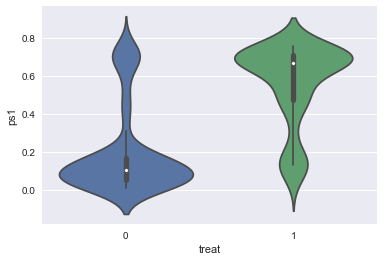

In [532]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

def compute_propensity(data):
    x = data[['age', 'educ', 'black', 'hispan', 'married', 'nodegree', 're74', 're75']]
    y = data['treat']
    logistic.fit(x,y)
    return logistic.predict_proba(x)[:,1]

propensity = compute_propensity(df)
df_copy = df.copy()
df_copy['ps1'] = propensity
sns.violinplot(x='treat', y='ps1', data=df_copy);

Definitly not well balanced...

We use for a caliper 0.2 * std(logit(propensity)) as suggested in https://www.ncbi.nlm.nih.gov/pubmed/20925139
for algorithm cf. http://onlinelibrary.wiley.com/doi/10.1002/sim.6004/epdf, we implemented greedy nearest neighbor (random) without replacement

In [534]:
from scipy.special import logit
from sklearn.utils import shuffle

def match(data, propensity, seed=1):
    np.random.seed(seed)
    
    caliper = 0.2 * logit(propensity).std()
    data_internal = data.copy()
    data_internal['propensity'] = propensity
    treated = data_internal[data_internal['treat'] == 1]
    not_treated = data_internal[data_internal['treat'] == 0]
    
    matched = treated.copy()
    for propensity in shuffle(treated['propensity']):
        distance = (propensity - not_treated['propensity']).abs()
        min_index = distance.argmin()
        min_dist = distance.loc[min_index]
        if min_dist < caliper:
            matched.loc[len(matched)] = not_treated.loc[min_index]
            not_treated.drop(min_index)
        else:
            print("No Match")
    return matched

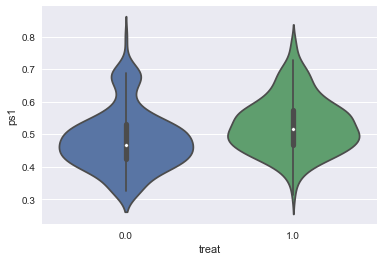

In [535]:
matched = match(df, propensity)
propensity = compute_propensity(matched)
matched['ps1'] = propensity
sns.violinplot(x='treat', y='ps1', data=matched);

Much better, median closer, shape closer

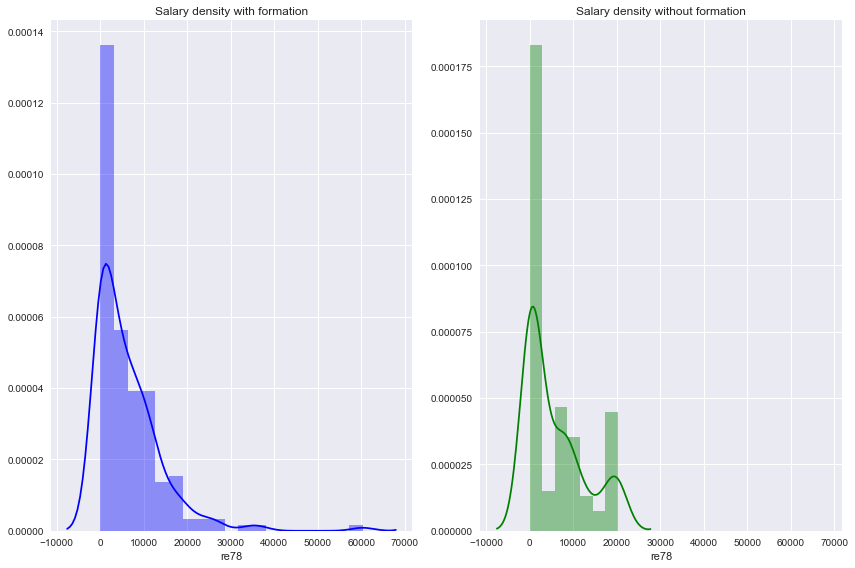

In [537]:
treated_res = matched[matched['treat'] == 1]['re78']
not_treated_res = matched[matched['treat'] == 0]['re78']

f, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=True)
ax = axes[0]
ax.set_title("Salary density with formation")
sns.distplot(treated_res, color="b",  ax=ax);
ax = axes[1]
ax.set_title("Salary density without formation")
sns.distplot(not_treated_res, color="g", ax=ax);
plt.tight_layout()

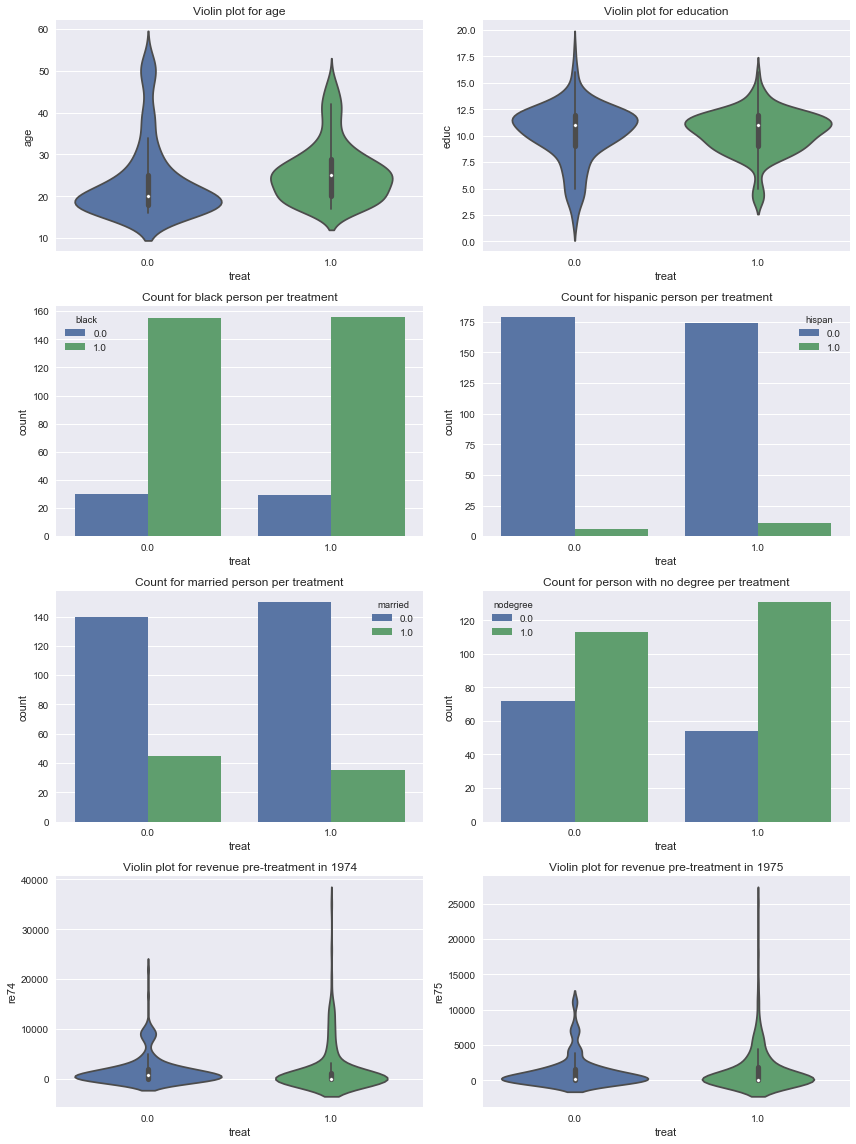

In [536]:
fig, axes = plt.subplots(4,2,figsize=(12,16))

axes[0, 0].set_title("Violin plot for age")
sns.violinplot(x='treat', y='age', data=matched, ax=axes[0, 0])
axes[0, 1].set_title("Violin plot for education")
sns.violinplot(x='treat', y='educ', data=matched, ax=axes[0, 1])

axes[1,0].set_title("Count for black person per treatment")
sns.countplot(x='treat',hue='black', data=matched, ax=axes[1,0])
axes[1,1].set_title("Count for hispanic person per treatment")
sns.countplot(x='treat',hue='hispan', data=matched, ax=axes[1,1])
axes[2,0].set_title("Count for married person per treatment")
sns.countplot(x='treat',hue='married', data=matched, ax=axes[2,0])
axes[2,1].set_title("Count for person with no degree per treatment")
sns.countplot(x='treat',hue='nodegree', data=matched, ax=axes[2,1])

axes[3, 0].set_title("Violin plot for revenue pre-treatment in 1974")
sns.violinplot(x='treat', y='re74', data=matched, ax=axes[3, 0])
axes[3, 1].set_title("Violin plot for revenue pre-treatment in 1975")
sns.violinplot(x='treat', y='re75', data=matched, ax=axes[3, 1])
plt.tight_layout();